<a href="https://colab.research.google.com/github/shaeyosh/co2emissions/blob/main/Lab_1_Yoshida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this lab is to analyze data regaurding CO2 emissions over the years for differing countries. I will be doing so by utilizing various python libraries and code to create graphs and formulate conclusions regaurding CO2 emission patterns.

## Imports

*   This code is used to import various libraries that can be used for the analysis of our CO₂ data as well as help with the formulation of different plots and graphs.



In [64]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

* Here I have imported the data file I will be using throughout this notebook from github as a dataframe.

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/shaeyosh/co2emissions/main/owid-co2-data.csv')

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

This code will allow me to create a new 

* Here I have created a new dataframe by selecting only the data that involves the country names from the original dataframe.

In [66]:
df_country = df[['country']]

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

* Here I am creating a new dataframe labeled non_countries.

In [67]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

* This code will create a list which contains all the listed "countries" that we will not be considering.

Remove the rows corresponding to the non-countries.

* Using the isin function == False, we are able to remove the non_countries listed above from our dataframe 

In [68]:
df = df.loc[df['country'].isin(non_countries) == False]

* this will make it so that the data listed under those countries won't affect our analysis.

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

* We use .head() to display the head of the data frame.

In [69]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### Solution

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

1. According to the Dtype section on the info display, all of the data types seem reasonable for their corresponding categories.   
2. After using the info method I have found that there are a lot of NaN values which can be determined by taking note that the number of non-null entries in certain collumns are a lot less than the total number of entries in the data set. Additionally through the isna function we are able to calculate how many null values there are across every variable.

* Using the .info() method we are able to figure out the data type and count of non-null entries across the dataframe.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

* We can then see how many entries are non-null from the table.

##### Solution

##### $\rightarrow$ What years are present in the data set?

##### Solution

* Using the .unique() function we are able to obtain a list of unique data entries 

In [71]:
df['year'].unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

* In this case .unique() gives us all the years the data spans over.

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

* Using the sort function to sort the values under the CO₂ collumn will make it so that the numbers are presented in decending order. Further, by using the ['year'] == 2020 we are able narrow our data to just the year 2020.

In [72]:
df[df['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


* This gives us a table which presents the top 10 CO₂ emitters.

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

* Using the Seaborn library we can use the .histplot function to create a basic histogram. We can then use matplotlib to refine our histogram and add elements such as axis labels and graph titles. To make this plot a density plot, we set stat = 'density'.

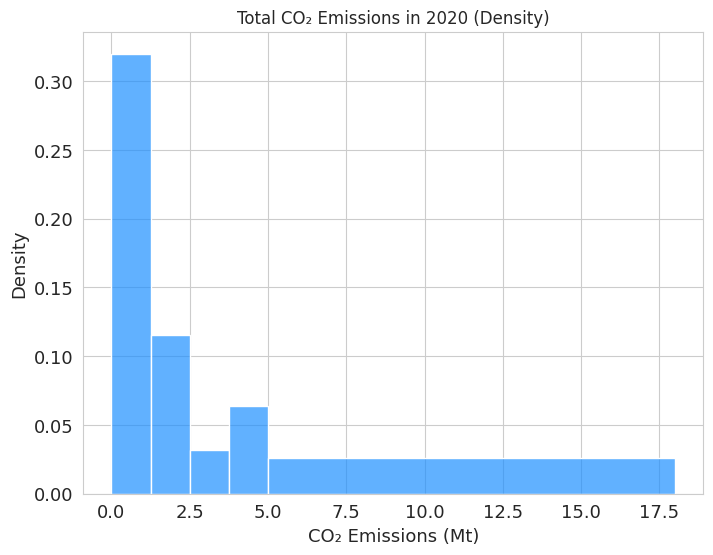

In [73]:
plt.figure(figsize = (8,6))

sns.histplot(data = df[df['year'] == 2020], x = 'co2', 
             bins = np.r_[np.linspace(0, 5, 5), 18], color = 'dodgerblue', alpha = 0.7, stat = 'density')
plt.title('Total CO₂ Emissions in 2020 (Density)')
plt.ylabel('Density',fontsize = 13)
plt.xlabel('CO₂ Emissions (Mt)',fontsize = 13)

plt.tick_params(labelsize = 13);

* This code prints out the histograms presented above.

##### Solution

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

* Using the Seaborn library we can use the .boxplot and .stripplot functions to create a basic boxplot and stripplot based on CO₂ emission data from 2020. We can then use matplotlib to refine our histogram and add elements such as axis labels and graph titles. 

(0.0, 2000.0)

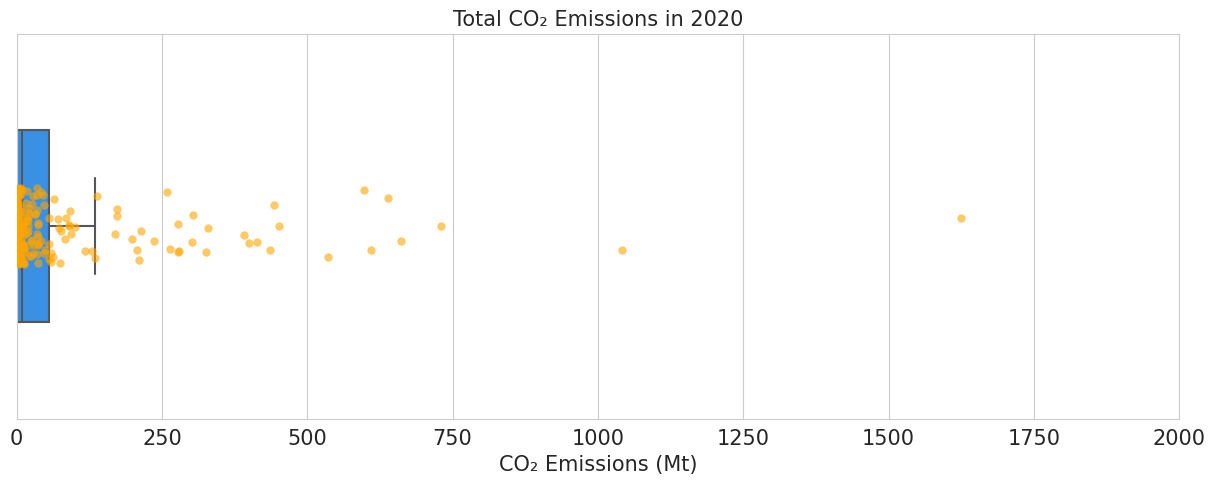

In [74]:
plt.figure(figsize = (15,5))

sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

plt.title('Total CO₂ Emissions in 2020', fontsize = 15)
plt.xlabel('CO₂ Emissions (Mt)', fontsize = 15)

plt.tick_params(labelsize = 15);
plt.xlim(0,2000)

* Doing so produces the graph we see above.

##### Solution

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

Based off the data above, the top 10 emitters are outliers in the distribution because they clearly lay outside of the upper extreme of the box plot. 

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

* The codes below will first create a new data frame. The second code will use this new dataframe to print out a table of true and false statements. 

In [75]:
df_top = df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])]

In [76]:
df_top[(df['year'] >= 1970) | (df['year'] <= 2020)].isna()

<ipython-input-76-18ed2f42eef2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top[(df['year'] >= 1970) | (df['year'] <= 2020)].isna()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8819,False,False,False,False,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8820,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8821,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8822,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8823,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44220,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


* The new dataframe now only includes the countries which are the top 10 emitters and the table shown above shows true and false statements based on whether the entry is NaN or not respectively. Further, by using (df['year'] >= 1970) | (df['year'] <= 2020) I am able to find this data in the years greater than or equal to 1970 and less than or equal to 2020

##### Solution

Yes the data set is missing some co2 emission values for the top 10 emitters as shown in the table above. By showing a "True" value, we can confirm that there are NaN values in those specific rows.



##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

* First I used the groupby function to group data by their country and year. From here I used the seaborn function .lineplot to graph CO₂ emissions by year and by country. Using matplotlib I then added in labels and adjusted the x-axis limit.

In [77]:
df_top.groupby(['country', 'year'])

<ipython-input-78-1c8bc00d0a6c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df_top[df['country'].isin(df_top['country'])],


Text(0, 0.5, 'CO₂ Emissions(Mt)')

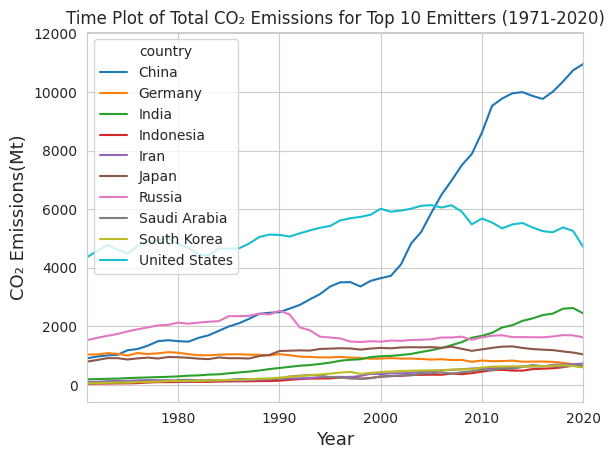

In [78]:
sns.lineplot(data=df_top[df['country'].isin(df_top['country'])],
             x='year',
             y='co2',
             hue='country')
plt.title('Time Plot of Total CO₂ Emissions for Top 10 Emitters (1971-2020)')
plt.xlim(1971, 2020)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('CO₂ Emissions(Mt)', fontsize = 13)


* The code explained above will result in the time plot shown above.

##### $\rightarrow$  Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

* I used the same code explained above to reproduce the original time plot for the CO₂ emissions of the top 10 emitters, but this time added in another line plot that graphed the total mean over the years for all countries in our data set. I did so by graphing a new dataframe that grouped year and CO₂ data together.

<ipython-input-79-2a53ebb24d7b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df_top[df['country'].isin(df_top['country'])],


Text(0, 0.5, 'CO₂ Emissions (Mt)')

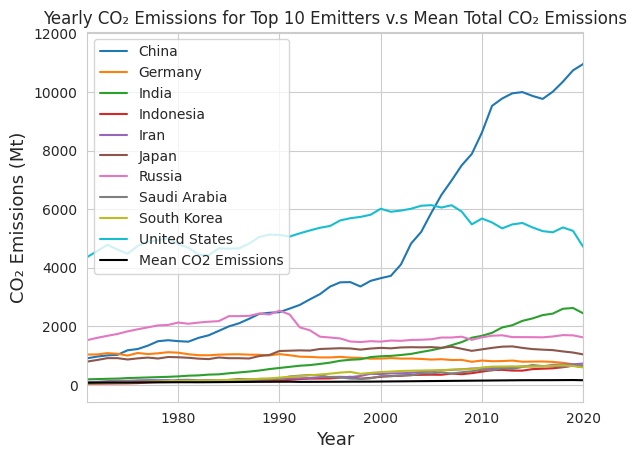

In [79]:
sns.lineplot(data=df_top[df['country'].isin(df_top['country'])],
             x='year',
             y='co2',
             hue='country')

mean_total_co2 = df.groupby('year')['co2'].mean()

sns.lineplot(data=mean_total_co2, color='black', label='Mean CO2 Emissions')

plt.xlim(1971, 2020)
plt.title('Yearly CO₂ Emissions for Top 10 Emitters v.s Mean Total CO₂ Emissions')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO₂ Emissions (Mt)', fontsize=13)

* The code above when executed will create the timeplot shown above.

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

* The code here is very similar to the code which I explained above, but this time I set the y-axis scale to 'log' which allowed me to plot my line plot results on a log scale. 

<ipython-input-80-a4f61b211d20>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df_top[df['country'].isin(df_top['country'])],


Text(0, 0.5, 'CO₂ Emissions (kilotons)')

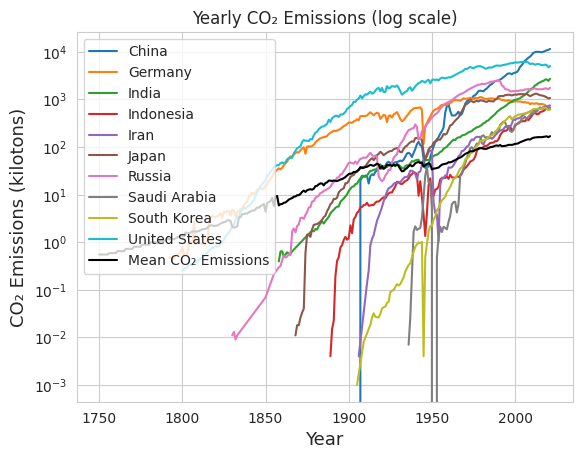

In [80]:
sns.lineplot(data=df_top[df['country'].isin(df_top['country'])],
             x='year',
             y='co2',
             hue='country')

mean_total_co2 = df.groupby('year')['co2'].mean()

sns.lineplot(data=mean_total_co2, color='black', label='Mean CO₂ Emissions')
plt.title('Yearly CO₂ Emissions (log scale)')
plt.yscale('log')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO₂ Emissions (kilotons)', fontsize=13)

* When this code is executed the graph above is created. Through this graph we are able to better visualize the CO₂ trends over the years.

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

Overall it seems that the CO₂ emissions overall are on an upward trend. Although the lines representing the top CO₂ emitters have a less clear trend, both those lines as well as the line representing the mean of CO₂ emissions for all the countries trend upward as time progresses.